In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

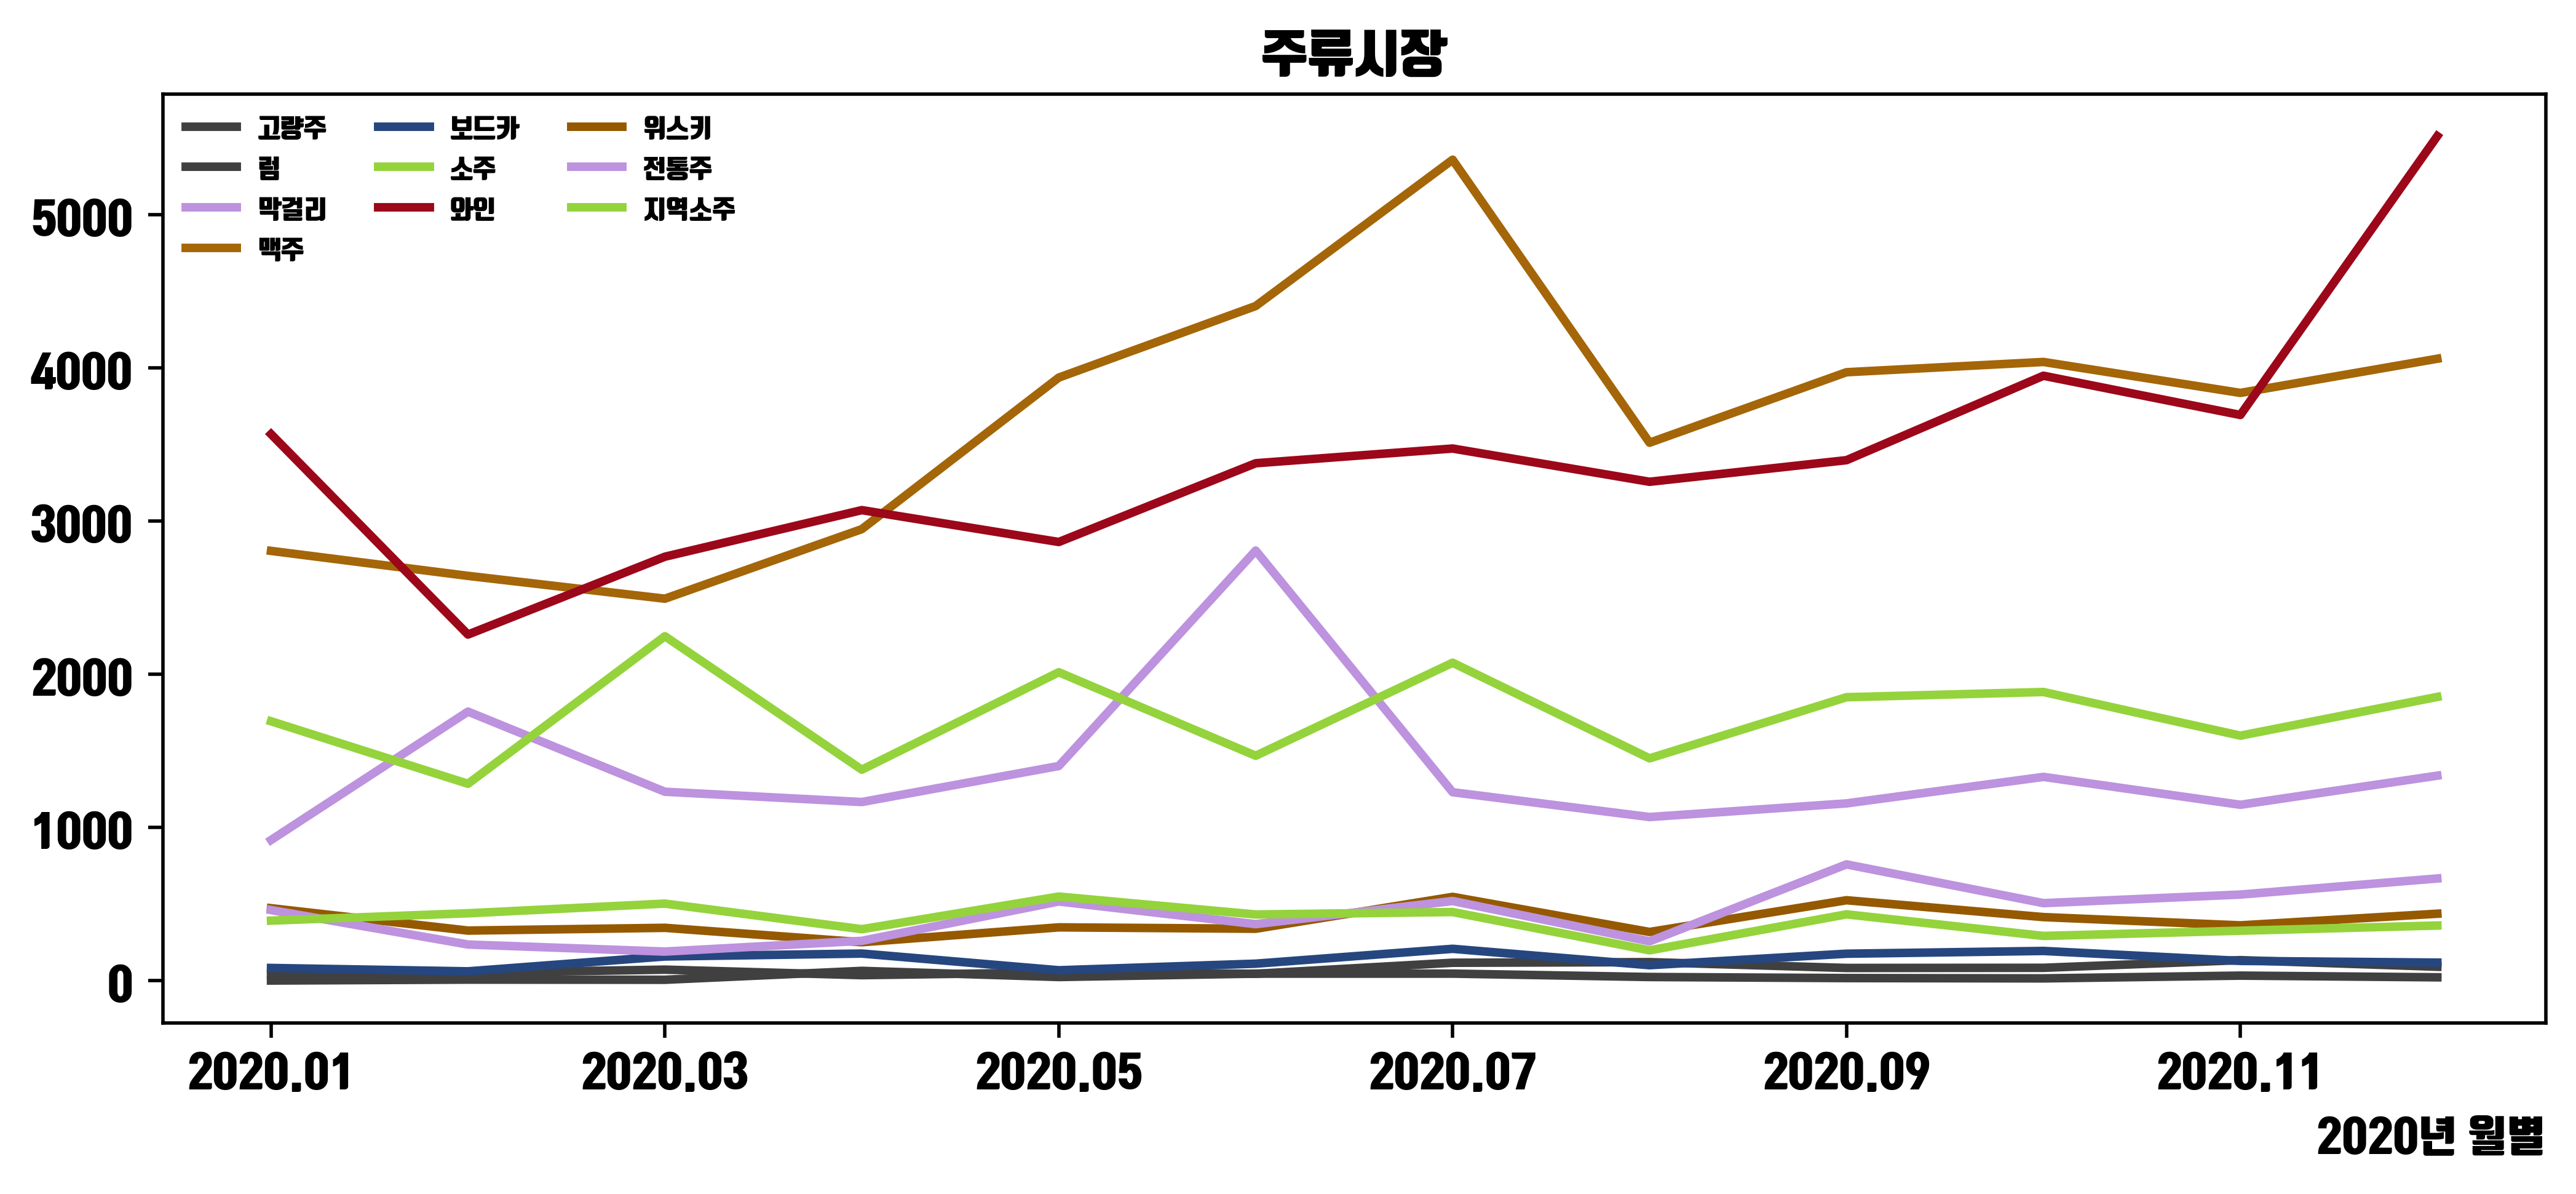

In [33]:
plt.rcParams['font.family'] = 'TmonMonsori' # 폰트 설정
plt.figure(dpi=500) # 해상도 설정

#### plot 그래프 기본크기 설정 #####
plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False
###################################

folder = ['고량주','럼','막걸리','맥주','보드카','소주','와인','위스키','전통주','지역소주']
color = ['#404040','#404040','#BD92DE','#A46608','#26467F','#94D33C','#9C071A','#955900','#BD92DE','#94D33C']
for a,c in zip(folder,color):
    df = pd.read_csv('data/네이버%s뉴스.csv'%(str(a))) ## 데이터 불러오기
    df = df.drop_duplicates(subset=None,keep='first',inplace=False) ## 중복값 제거
    df.columns=['num','yyyymmdd','names','title','text'] ## 컬럼이름 변경
    df['yyyymm'] = df['yyyymmdd'].apply(lambda x: x[0:7]) ## yyyymm 컬럼생성

    ## 2021년 1월 데이터 삭제 ##
    df_drop = df[df['yyyymm']=='2021.01'].index 
    df = df.drop(df_drop)
    ###########################

    df_groupby = df.groupby(['yyyymm']).agg('size') ## 월별 size 그룹화
    df_groupby.plot(color=c)
    
plt.title('주류시장') ## 타이틀 설정
plt.xlabel('2020년 월별',loc='right') 
plt.legend(['고량주','럼','막걸리','맥주','보드카','소주','와인','위스키','전통주','지역소주'],loc='upper left', ncol = 3, fontsize=6, frameon = False)
plt.show()  

In [11]:
# folder = ['고량주','럼','보드카','위스키','전통주','지역소주']
# for a in folder:
#     df = pd.read_csv('data/네이버%s뉴스.csv'%(str(a)))
#     df = df.drop_duplicates(subset=None,keep='first',inplace=False)
#     df.columns=['num','yyyymmdd','names','title','text']
#     df['yyyymm'] = df['yyyymmdd'].apply(lambda x: x[0:7])
#     df.shape
#     ## 2021년 1월 데이터 삭제
#     df_drop = df[df['yyyymm']=='2021.01'].index
#     df = df.drop(df_drop)


#     df_groupby = df.groupby(['yyyymm']).agg('size')
#     # df_groupby.columns[a]
#     df_groupby.plot()
#     plt.xlabel('2020년도 월별')
#     plt.legend(['고량주','럼','보드카','위스키','전통주','지역소주'],loc='upper left', ncol = 3, fontsize=7, frameon = False)

In [6]:
## 고량주, 럼(#404040) -> 약간 옅은 검정
## 맥주(#A46608) -> 노란색인데 약간 맥주 #A46608
## 보드카(#26467F) -> 블루
## 위스키(#955900) -> 맥캘란 color
## 소주(#94D33C) -> 연두색 약간 소주병
## 전통주, 막걸리(#BD92DE) -> 베이지or보라색